In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from scipy import stats

%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [44]:
train = pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
test = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
train['Survived'].unique()
train['Parch'].unique()
train['Pclass'].unique()

array([3, 1, 2])

In [47]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [48]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

Age       86
Fare       1
Cabin    327
dtype: int64

In [49]:
train_pid = train['PassengerId']

In [50]:
test_pid = test['PassengerId']

In [51]:
del train['PassengerId']
del train['Cabin']

In [52]:
del test['PassengerId']
del test['Cabin']

In [53]:
train['Age'][train['Sex']=='female'] = train['Age'][train['Sex']=='female'].fillna(train['Age'][train['Sex']=='female'].std())
train['Age'][train['Sex']=='male'] = train['Age'][train['Sex']=='male'].fillna(train['Age'][train['Sex']=='male'].std())

In [54]:
test['Age'][test['Sex']=='female'] = test['Age'][test['Sex']=='female'].fillna(test['Age'][test['Sex']=='female'].std())
test['Age'][test['Sex']=='male'] = test['Age'][test['Sex']=='male'].fillna(test['Age'][test['Sex']=='male'].std())

In [55]:
train.dropna(inplace = True)

In [56]:
test['Fare'] = test['Fare'].fillna(test['Fare'].std())

In [57]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [58]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

Series([], dtype: float64)

In [59]:
train['Age'].skew()

0.7292945621145042

In [60]:
test['Age'].skew()

0.7664491966830509

<AxesSubplot:xlabel='Age', ylabel='Survived'>

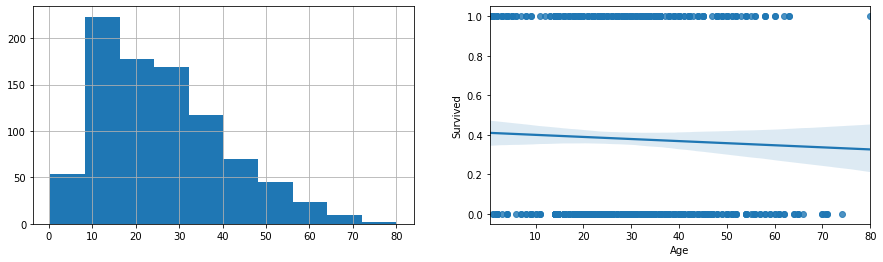

In [61]:
plt.subplots(figsize =(15, 4))

plt.subplot(1, 2, 1)
train['Age'].hist()

plt.subplot(1, 2, 2)
sns.regplot(x= train['Age'] , y=train['Survived'] , fit_reg=True)

In [62]:
train['Age'] = np.sqrt(train['Age'])
train['Age'].skew()

-0.16739267521055792

In [63]:
test['Age'] = np.sqrt(test['Age'])
test['Age'].skew()

-0.10680693841171424

<AxesSubplot:xlabel='Age', ylabel='Survived'>

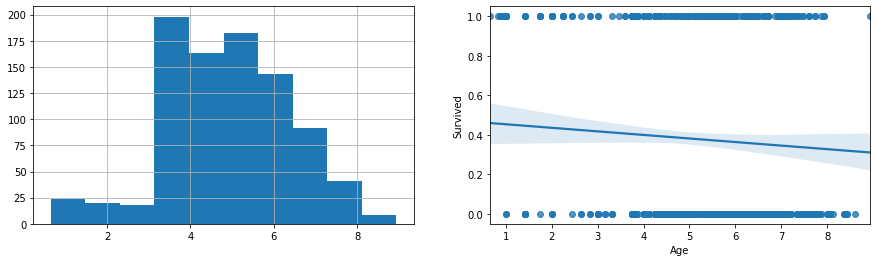

In [64]:
plt.subplots(figsize =(15, 4))

plt.subplot(1, 2, 1)
train['Age'].hist()

plt.subplot(1, 2, 2)
sns.regplot(x= train['Age'] , y=train['Survived'] , fit_reg=True)

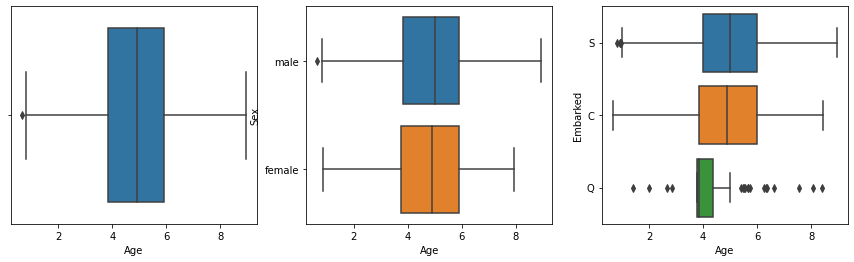

In [65]:
plt.subplots(figsize =(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=train['Age'])

plt.subplot(1, 3, 2)
sns.boxplot(x="Age", y="Sex", data=train);

plt.subplot(1, 3, 3)
sns.boxplot(x="Age", y="Embarked", data=train);


In [66]:
train['Family_Size']=train['SibSp']+train['Parch']
del train['SibSp']
del train['Parch']

In [67]:
test['Family_Size']=test['SibSp']+test['Parch']
del test['SibSp']
del test['Parch']

In [68]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [69]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

train['Title']=train['Name'].map(lambda x: substrings_in_string(x, title_list))
test['Title']=test['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
train['Title']=train.apply(replace_titles, axis=1)
del train['Name']

test['Title']=test.apply(replace_titles, axis=1)
del test['Name']

In [70]:
train.sort_values(by='Ticket').head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family_Size,Title
759,1,1,female,5.744563,110152,86.50,S,0,Mrs
257,1,1,female,5.477226,110152,86.50,S,0,Miss
504,1,1,female,4.000000,110152,86.50,S,0,Miss
585,1,1,female,4.242641,110413,79.65,S,2,Miss
558,1,1,female,6.244998,110413,79.65,S,2,Mrs


In [71]:
from sklearn.preprocessing import LabelEncoder
label_sex = LabelEncoder()
label_embark = LabelEncoder()
label_title = LabelEncoder()


train['Sex'] = label_sex.fit_transform(train['Sex'])
train['Embarked'] = label_embark.fit_transform(train['Embarked'])
train['Title'] = label_title.fit_transform(train['Title'])

test['Sex'] = label_sex.fit_transform(test['Sex'])
test['Embarked'] = label_embark.fit_transform(test['Embarked'])
test['Title'] = label_title.fit_transform(test['Title'])


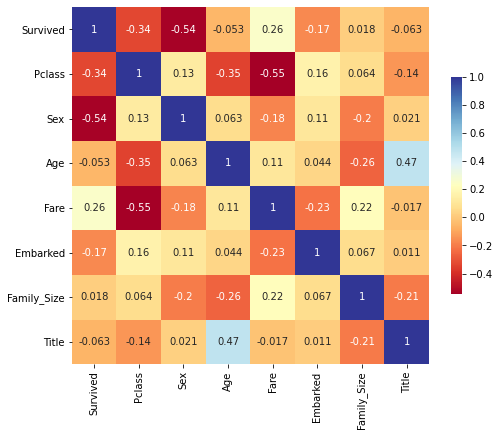

In [72]:
corr = train.corr()
plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [73]:
train['Fare'] = np.abs(stats.zscore(train['Fare']))

In [74]:
test['Fare'] = np.abs(stats.zscore(test['Fare']))

In [75]:
del train['Ticket']

In [76]:
del test['Ticket']

In [77]:
y_class = train['Survived']
del train['Survived']

In [78]:
train.head()

,Pclass,Sex,Age,Fare,Embarked,Family_Size,Title
0,3,1,4.690416,0.500240,2,1,2
1,1,0,6.164414,0.788947,0,1,3
2,3,0,5.099020,0.486650,2,0,1
3,1,0,5.916080,0.422861,2,1,3
4,3,1,5.916080,0.484133,2,0,2


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,y_class,test_size=0.3 , random_state=101)

In [80]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(train, y_class)                  # 3. fit model to data
y_model = model.predict(test)             # 4. predict on new data

In [81]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_model)

In [82]:
y_model[0:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [83]:
#y_test.iloc[0:10]

In [84]:
gender_sub = pd.read_csv("../input/titanic/gender_submission.csv" , usecols=['Survived'])
gender_sub.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [85]:
#test_data = model.predict(test)

In [86]:
accuracy_score(gender_sub, y_model)

0.9234449760765551

In [87]:
submission = pd.DataFrame({
        "PassengerId": test_pid,
        "Survived": y_model
    })
submission.to_csv('gender_sub.csv', index=False)